In [1]:
import pandas as pd

data = pd.read_table('glass.data', sep=',', header=None, index_col=None)  # 加载本地数据
data.to_csv('glass.csv', sep=',', header=True, index=False)  # data转成csv并保存为glass.csv文件
# 读取生成的glass.csv文件进行验证
csv = pd.read_csv('glass.csv', sep=',')

# 创建一个空字典来存储列名及其对应的序号
column_names_dict = {}

# 打开 .names 文件以读取列名
with open('filtered_glass_names.names', 'r') as file:
    for line in file:
        column_name = line.strip()  # 去除前导/尾随空格
        if column_name:  # 判断行是否非空
            # 提取序号和列名
            parts = column_name.split('. ', 1)
            if len(parts) == 2:
                index, name = parts
                # 使用 strip() 去除前导空格并尝试将序号转换为整数
                try:
                    index = int(index.strip())
                    # 将序号和列名添加到字典中
                    column_names_dict[index] = name
                except ValueError:
                    pass  # 忽略无法转换为整数的行

# 对列名按照序号进行排序
sorted_column_names = [column_names_dict[i] for i in sorted(column_names_dict.keys())]

# 打印排序后的列名
print(sorted_column_names)

# 读取数据文件并保存为CSV文件，使用逗号作为分隔符
data = pd.read_csv('glass.csv', sep=',', index_col=None)
df = data
df.columns = sorted_column_names
df.to_csv('glass.csv', sep=',', index=False) 

# 打印DataFrame
print(df)


['Id number: 1 to 214', 'RI: refractive index', 'Na: Sodium', 'Mg: Magnesium', 'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium', 'Ba: Barium', 'Fe: Iron', 'Type of glass: (class attribute)']
     Id number: 1 to 214  RI: refractive index  Na: Sodium  Mg: Magnesium  \
0                      1               1.52101       13.64           4.49   
1                      2               1.51761       13.89           3.60   
2                      3               1.51618       13.53           3.55   
3                      4               1.51766       13.21           3.69   
4                      5               1.51742       13.27           3.62   
..                   ...                   ...         ...            ...   
209                  210               1.51623       14.14           0.00   
210                  211               1.51685       14.92           0.00   
211                  212               1.52065       14.36           0.00   
212                  213   

Accuracy: 0.6307692307692307
Confusion Matrix:
[[15  4  0  0  0  0]
 [ 7 15  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  1  0  0  0  2]
 [ 0  0  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.79      0.70        19
           2       0.56      0.65      0.60        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         3
           7       0.83      1.00      0.91        10

    accuracy                           0.63        65
   macro avg       0.50      0.43      0.42        65
weighted avg       0.60      0.63      0.58        65



d:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

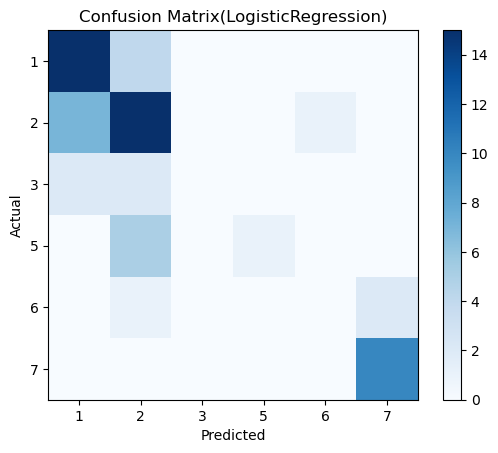

d:\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


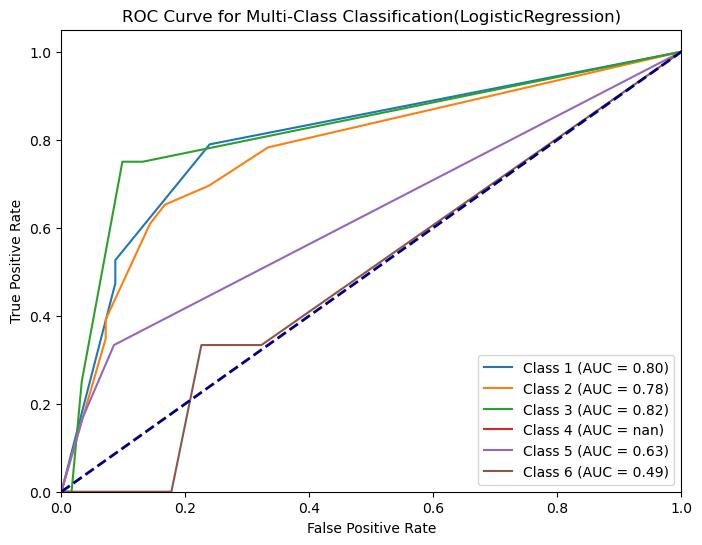

In [8]:
#多分类的逻辑回归模型 （Confusion Matrix + Roc）
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. 读取数据
data = pd.read_csv('glass.csv')

# 2. 划分特征和标签
X = data.iloc[:, 1:-1]  # 选择中间九列作为特征
y = data['Type of glass: (class attribute)']  # 类别标签

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 创建并训练逻辑回归模型
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 5. 模型预测
y_pred = model.predict(X_test)

# 6. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# 绘制混淆矩阵
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix(LogisticRegression)')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 绘制 ROC 曲线
n_classes = len(model.classes_)

# 为每个类别计算 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1, n_classes + 1):  # 类别标签从1到7
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i - 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
for i in range(1, n_classes + 1):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification(LogisticRegression)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.7692307692307693
Confusion Matrix:
[[15  2  2  0  0  0]
 [ 3 16  0  0  3  1]
 [ 1  0  3  0  0  0]
 [ 0  1  0  5  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        19
           2       0.84      0.70      0.76        23
           3       0.60      0.75      0.67         4
           5       0.83      0.83      0.83         6
           6       0.33      0.67      0.44         3
           7       0.90      0.90      0.90        10

    accuracy                           0.77        65
   macro avg       0.72      0.77      0.73        65
weighted avg       0.80      0.77      0.78        65



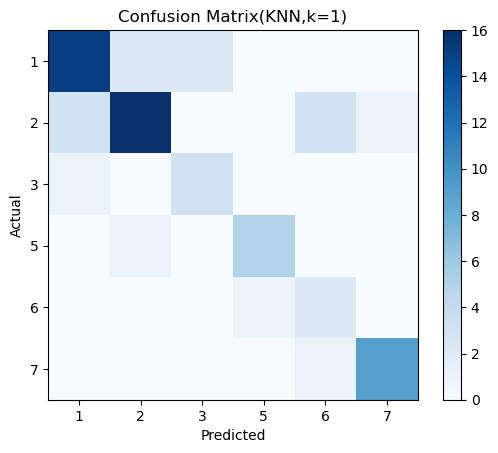

In [9]:
#KNN（K近邻算法，k=1）

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('glass.csv')

# 划分特征和标签
X = data.iloc[:, 1:-1]  # 特征列
y = data['Type of glass: (class attribute)']  # 标签列

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建K近邻模型
k = 1  # 设置K值
knn = KNeighborsClassifier(n_neighbors=k)

# 拟合模型
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

# 6. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix(KNN,k=1)')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.6307692307692307
Confusion Matrix:
[[11  3  4  0  0  1]
 [ 6 12  3  1  1  0]
 [ 1  0  3  0  0  0]
 [ 0  0  0  4  2  0]
 [ 0  0  0  0  2  1]
 [ 1  0  0  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.58      0.58        19
           2       0.80      0.52      0.63        23
           3       0.30      0.75      0.43         4
           5       0.80      0.67      0.73         6
           6       0.40      0.67      0.50         3
           7       0.82      0.90      0.86        10

    accuracy                           0.63        65
   macro avg       0.62      0.68      0.62        65
weighted avg       0.69      0.63      0.64        65



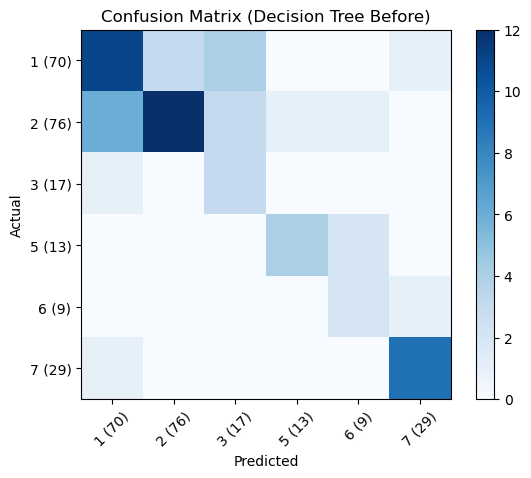

d:\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


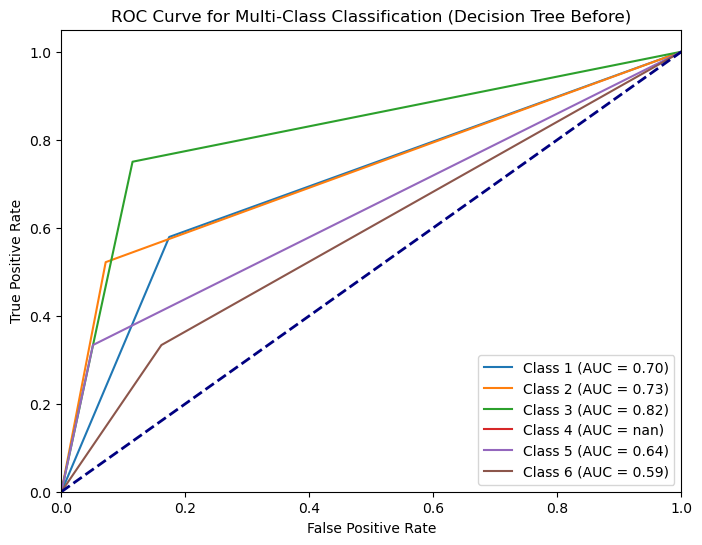

In [13]:
#决策树（未优化）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# 1. 读取数据
data = pd.read_csv('glass.csv')

# 2. 划分特征和标签
X = data.iloc[:, 1:-1]  # 选择中间九列作为特征
y = data['Type of glass: (class attribute)']  # 类别标签

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 创建并训练决策树模型
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 5. 模型预测
y_pred = model.predict(X_test)

# 6. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# 绘制混淆矩阵
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix (Decision Tree Before)')
plt.colorbar()

# 获取类别的唯一标签和数量
unique_labels, counts = np.unique(y, return_counts=True)

# 将标签和数量一起显示在x轴和y轴
plt.xticks(np.arange(len(unique_labels)), [f'{l} ({c})' for l, c in zip(unique_labels, counts)], rotation=45)
plt.yticks(np.arange(len(unique_labels)), [f'{l} ({c})' for l, c in zip(unique_labels, counts)])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 计算并绘制ROC曲线
n_classes = len(np.unique(y))

y_prob = model.predict_proba(X_test)

# 为每个类别计算ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1, n_classes + 1):  # 类别标签从1到7
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i - 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
for i in range(1, n_classes + 1):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Decision Tree Before)')
plt.legend(loc='lower right')
plt.show()


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6923076923076923
Confusion Matrix:
[[16  2  0  0  1  0]
 [ 6 13  2  1  1  0]
 [ 2  1  1  0  0  0]
 [ 0  1  0  3  2  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.84      0.73        19
           2       0.76      0.57      0.65        23
           3       0.33      0.25      0.29         4
           5       0.75      0.50      0.60         6
           6       0.43      1.00      0.60         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.65      0.68      0.64        65
weighted avg       0.72      0.69      0.69        65



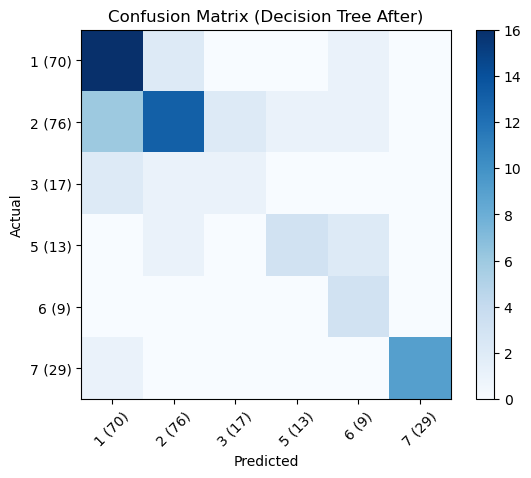

d:\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


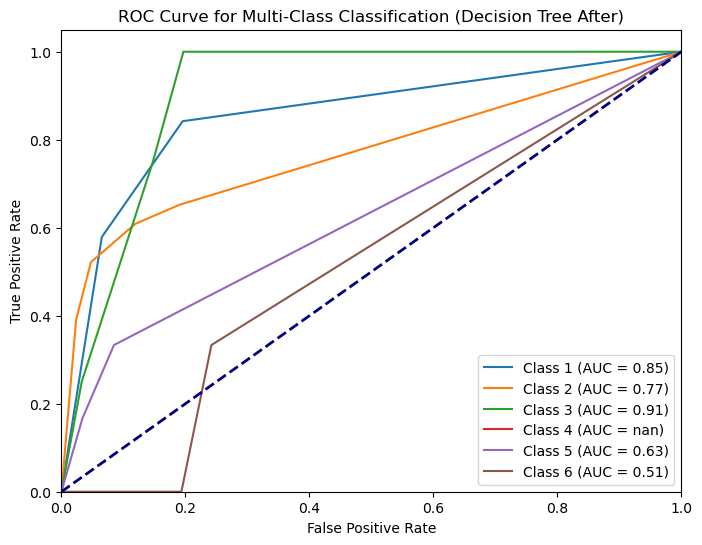

In [14]:
#超参数调整后的决策树
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# 1. 读取数据
data = pd.read_csv('glass.csv')

# 2. 划分特征和标签
X = data.iloc[:, 1:-1]  # 选择中间九列作为特征
y = data['Type of glass: (class attribute)']  # 类别标签

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 超参数调整
param_grid = {
    'max_depth': [None, 10, 20, 30],  # 调整树的最大深度
    'min_samples_split': [2, 5, 10],  # 调整分割节点的最小样本数
    'min_samples_leaf': [1, 2, 4]  # 调整叶节点的最小样本数
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. 创建并训练决策树模型
model = DecisionTreeClassifier(**best_params)  # 使用最佳超参数组合
model.fit(X_train, y_train)

# 6. 模型预测
y_pred = model.predict(X_test)

# 7. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# 绘制混淆矩阵
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix (Decision Tree After)')
plt.colorbar()

# 获取类别的唯一标签和数量
unique_labels, counts = np.unique(y, return_counts=True)

# 将标签和数量一起显示在x轴和y轴
plt.xticks(np.arange(len(unique_labels)), [f'{l} ({c})' for l, c in zip(unique_labels, counts)], rotation=45)
plt.yticks(np.arange(len(unique_labels)), [f'{l} ({c})' for l, c in zip(unique_labels, counts)])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 计算并绘制ROC曲线
n_classes = len(np.unique(y))
y_prob = model.predict_proba(X_test)

# 为每个类别计算ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1, n_classes + 1):  # 类别标签从1到7
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i - 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
for i in range(1, n_classes + 1):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Decision Tree After)')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.3076923076923077
Confusion Matrix:
[[ 0  1 18  0  0  0]
 [ 1  4 15  1  1  1]
 [ 1  0  3  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.40      0.17      0.24        23
           3       0.08      0.75      0.15         4
           5       0.33      0.17      0.22         6
           6       0.75      1.00      0.86         3
           7       0.90      0.90      0.90        10

    accuracy                           0.31        65
   macro avg       0.41      0.50      0.40        65
weighted avg       0.35      0.31      0.29        65



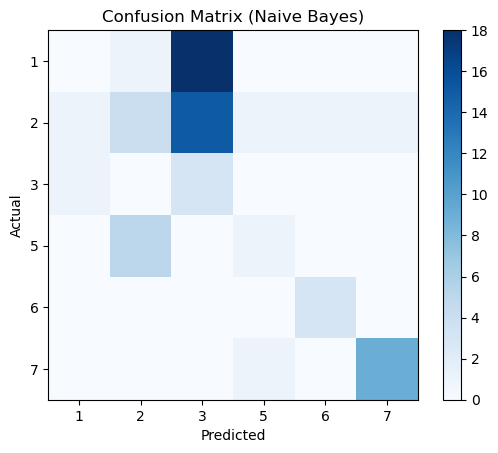

D:\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


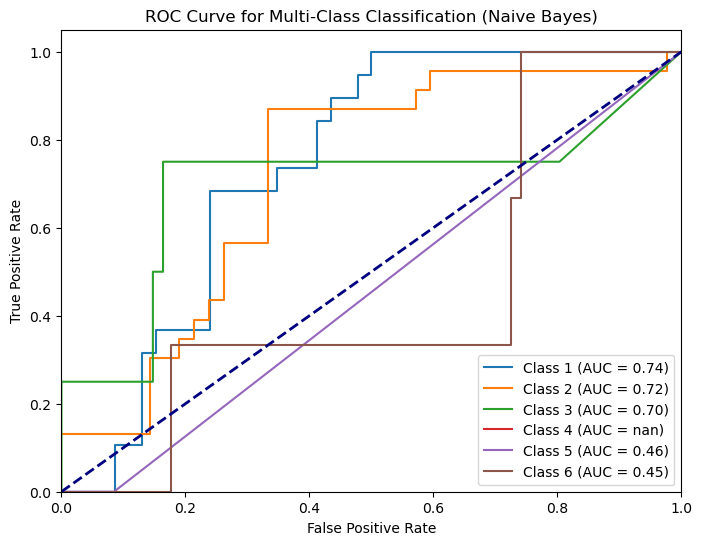

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# 1. 读取数据
data = pd.read_csv('glass.csv')

# 2. 划分特征和标签
X = data.iloc[:, 1:-1]  # 选择中间九列作为特征
y = data['Type of glass: (class attribute)']  # 类别标签

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 创建并训练朴素贝叶斯模型
model = GaussianNB()
model.fit(X_train, y_train)

# 5. 模型预测
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# 6. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# 绘制混淆矩阵
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix (Naive Bayes)')
plt.colorbar()
# 修改如下两行代码来设置刻度标签
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, [1, 2, 3, 5, 6, 7])
plt.yticks(tick_marks, [1, 2, 3, 5, 6, 7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 绘制 ROC 曲线
n_classes = len(np.unique(y))
plt.figure(figsize=(8, 6))
for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.35384615384615387
Confusion Matrix:
[[ 0 19  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0 10  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.35      1.00      0.52        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        10

    accuracy                           0.35        65
   macro avg       0.06      0.17      0.09        65
weighted avg       0.13      0.35      0.18        65



d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


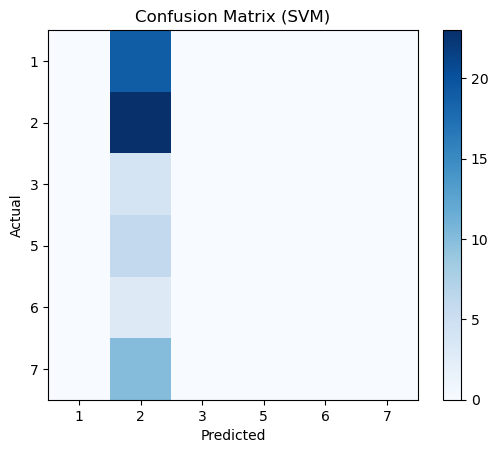

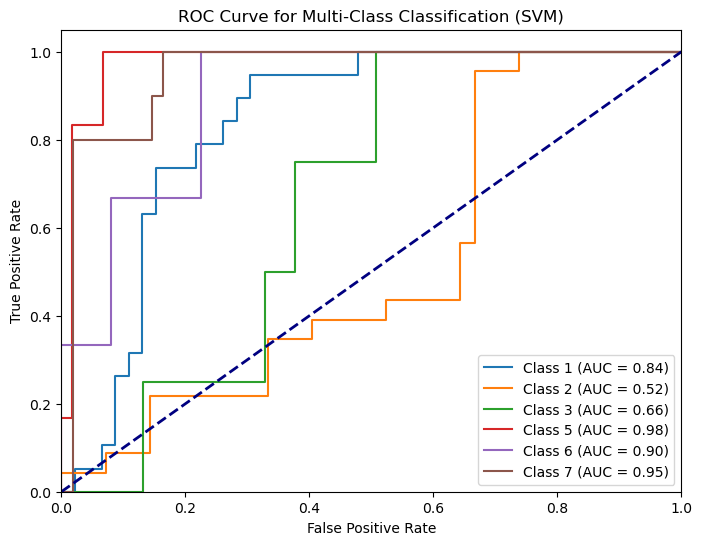

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. 读取数据
data = pd.read_csv('glass.csv')

# 2. 划分特征和标签
X = data.iloc[:, 1:-1]  # 选择中间九列作为特征
y = data['Type of glass: (class attribute)']  # 类别标签

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 创建并训练支持向量机模型
model = SVC(decision_function_shape='ovr')  # 使用"ovr"进行多类别分类
model.fit(X_train, y_train)

# 5. 模型预测
y_pred = model.predict(X_test)

# 6. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# 绘制混淆矩阵
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix (SVM)')
plt.colorbar()
classes = [1, 2, 3, 5, 6, 7]
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. 绘制 ROC 曲线
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (SVM)')
plt.legend(loc='lower right')
plt.show()
